In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import date

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# find the last date in the file
last_date = session.query(func.max(Measurement.date)).first()
print(last_date)

('2017-08-23',)


In [11]:
#Converting date to an integer and breaking out year, month, and day
last_date2=str(last_date)
year = int(last_date2[2]+ last_date2[3]+ last_date2[4]+ last_date2[5])
print(year)
month = int(last_date2[7]+ last_date2[8])
print(month)
day = int(last_date2[10]+ last_date2[11])
print(day)

2017
8
23


In [12]:
#calulate the date 1 year ago from the last data ppoint in the database
# using the timeline to calculate the py

query_date = dt.date(year, month, day) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
maxdate = dt.date(year, month, day)
prcp_list = []   
prcp_list = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > query_date).filter(Measurement.date <= maxdate).\
    all()

print(prcp_list)

[('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 0.0), ('2016-10-09', 

In [20]:
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column
prcpdf = pd.DataFrame(prcp_list)
prcpdf['date'] = pd.to_datetime(prcpdf['date'])
prcpdf.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


In [21]:
# Sort the dataframe by date
prcpdf2 = prcpdf.set_index('date')
prcpdf2.rename(columns = {'prcp': 'Precipitaion'}, inplace=True)
prcpdf2.head()

# Use Pandas Plotting with Matplotlib to plot the data

,Precipitaion
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


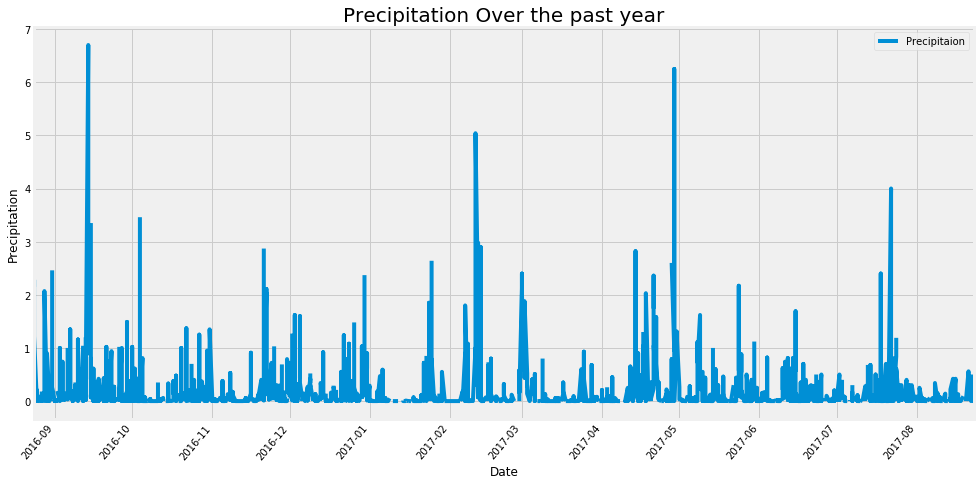

In [24]:
# Use Pandas Plotting with Matplotlib to plot the data
prcpdf2.plot(figsize=(15, 8),sort_columns=True,rot=50,use_index=True,legend=True)
plt.xlabel('Date')
plt.ylabel("Precipitation")
plt.title("Precipitation Over the past year", fontsize=20)
plt.savefig('barplot1')
plt.show()

![precipitation](Images/precipitation.png)

In [25]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcpdf2.describe()

,Precipitaion
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [26]:
# Design a query to show how many stations are available in this dataset?
stationcount = []
stationcount = session.query(Station.station).count()
print(stationcount)

9


In [29]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stationhits = []   
stationhits = session.query(Measurement.station, Station.name, func.count(Measurement.station)).\
filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
stationhits

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [31]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
mostsactivestats = []   
mostsactivestats = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station == Station.station).filter(Station.name==mostactive).all()
print(mostsactivestats)
lowesttemp = mostsactivestats[0][0]
highesttemp = mostsactivestats[0][1]
avgtemp = mostsactivestats[0][2]
print(f'For {mostactive}, the lowest temperature is {lowesttemp}. The highest temp is {highesttemp}. The average temp is {avgtemp}.')

[(54.0, 85.0, 71.66378066378067)]
For WAIHEE 837.5, HI US, the lowest temperature is 54.0. The highest temp is 85.0. The average temp is 71.66378066378067.


In [34]:
# Choose the station with the highest number of temperature observations.

stationhits[0][0]


'USC00519281'

In [35]:
#query for the last 12 months of temperature observation data for most active station
hist_list = []   
hist_list = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == stationhits[0][0]).filter(Measurement.date > query_date).\
    filter(Measurement.date <= maxdate).\
    all()
#print(hist_list)

#adding query to dataframe
hist_df = pd.DataFrame(hist_list)
hist_df.head()
#converting date to datetime
hist_df['date'] = pd.to_datetime(hist_df['date'])
hist_df.head()

,station,date,tobs
0,USC00519281,2016-08-24,77.0
1,USC00519281,2016-08-25,80.0
2,USC00519281,2016-08-26,80.0
3,USC00519281,2016-08-27,75.0
4,USC00519281,2016-08-28,73.0


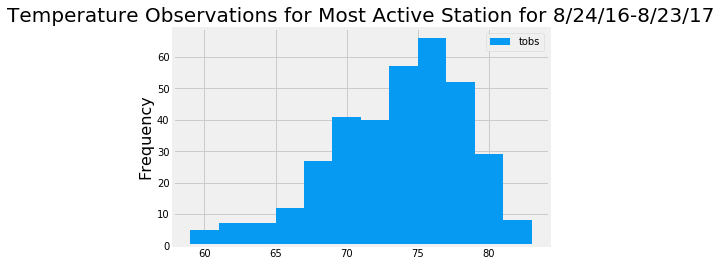

In [36]:
#plot the results from Query of the last 12 months of tobs data for this stations a histogram
hist_temps=hist_df['tobs']
plt.hist(hist_temps, bins=12, color='xkcd:azure')
plt.title("Temperature Observations for Most Active Station for 8/24/16-8/23/17", fontsize=20)
plt.ylabel('Frequency', fontsize=16)
labels = ['tobs']
plt.legend(labels)
plt.savefig('histogram1')
plt.show()

![precipitation](Images/station-histogram.png)

In [37]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [38]:
#choosing start and end dates for my trip
start_date = '2019-11-20'
end_date = '2019-11-29'

In [41]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def convert(yourdate):
    result = yourdate.replace('2019', '2016')
    return result

con_start_date = convert(start_date)
print(con_start_date)
con_end_date = convert(end_date)
print(con_end_date)

2016-11-20
2016-11-29


In [42]:
results = calc_temps(con_start_date, con_end_date)
print(results)

[(67.0, 74.31147540983606, 80.0)]


C:\Users\eloba\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


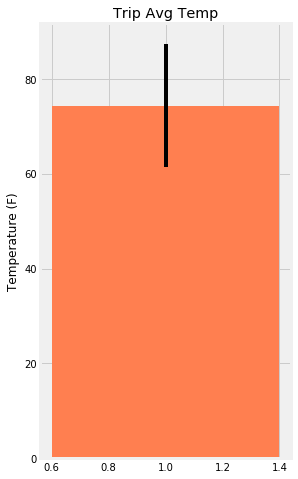

In [43]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

fig, ax = plt.subplots(figsize=plt.figaspect(2.))
peak = results[0][2] - results[0][0]
bar = ax.bar(1, results[0][1], yerr = peak, color = "coral")
plt.title("Trip Avg Temp")
plt.ylabel("Temperature (F)")
fig.show()

In [44]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

fortripavg = calc_temps(con_start_date,con_end_date)
print(fortripavg)
print(type(fortripavg))

[(67.0, 74.31147540983606, 80.0)]
<class 'list'>


In [45]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rainfalllist = session.query(Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.count(Measurement.prcp)).\
filter(Measurement.date > con_start_date).filter(Measurement.date <= con_end_date).\
group_by(Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation).order_by(func.count(Measurement.prcp).desc()).all()
rainfalllist


[('USC00513117',
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9,
  9),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 9),
 ('USC00513117',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  9),
 ('USC00513117', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 9),
 ('USC00513117', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 9),
 ('USC00513117', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 9),
 ('USC00513117',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  9),
 ('USC00513117', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 9),
 ('USC00513117',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  9),
 ('USC00516128',
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9,
  9),
 ('USC00516128', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 9),
 ('USC00516128',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0

## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
